# Project Title: Bank Marketing Campaign Prediction  Project (Prediction Of Bank Product Uptake )

#### Project Definition 

Direct marketing is a form of communicating an offer, where organizations communicate directly to a pre-selected customer and supply a method for a direct response. Among practitioners, it is also known as direct response marketing.  Mail, Phone calls, texting are among the most common modes used for direct marketing. These days many companies are shifting towards direct marketing campaigns due to various cost factors.In banks, huge data records information about their customers. This data can be used to create and keep clear relationship and connection with the customers in order to target them individually for definite products or banking offers. Usually, the selected customers are contacted directly through: personal contact, telephone cellular, mail, and email or any other contacts to advertise the new product/service or give an offer, this kind of marketing is called direct marketing. In fact, direct marketing is in the main a strategy of many of the banks and insurance companies for interacting with their customers.

#### Problem Statement: 

A Portuguese banking institution—ran a marketing campaign to convince potential customers to invest in bank term deposit. The data is related to direct marketing campaigns of the bank.

The marketing campaigns were based on phone calls. Often, more than one contact by phone to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Based on the dataset, we want to predict whether a customer will buy the product or not.


In [1]:
#import python libraries for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation 
from datetime import datetime as dt



# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [4]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [5]:
#inspect the data

##check shape of the entire dataframe using .shape attribute
data.shape

(4521, 17)

### We have 4,521 rows and 17 columns

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### There are no missing values in the data set

In [7]:
#use info() method to check columns and datatypes of each column in your data frame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [8]:
# change object columns to integer 
data["age"] = pd.to_numeric(data["age"])
data["balance"] = pd.to_numeric(data["balance"])
data["day"] = pd.to_numeric(data["day"])
data["duration"] = pd.to_numeric(data["duration"])
data["campaign"] = pd.to_numeric(data["campaign"])
data["pdays"] = pd.to_numeric(data["pdays"])
data["previous"] = pd.to_numeric(data["previous"])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
#To determine the number of datatypes

data.dtypes.value_counts()

object    10
int64      7
dtype: int64

### We only have int and string data types as features, while 7 features are numerical and 8 features are categorical. There is no feature with float.

In [12]:
data.y

1       no
2       no
3       no
4       no
5       no
        ..
4517    no
4518    no
4519    no
4520    no
4521    no
Name: y, Length: 4521, dtype: object

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [13]:
#data cleasning cells


In [14]:
data.drop(columns=['default'], inplace = True)

In [15]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
data.shape

(4521, 16)

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

In [17]:
#univariate analysis cells

# Age (Min age = 19, max age = 87)

# create a func that categorizes Client's age

def age_bracket(age):
    if age <= 29:
        return "Youth(19-29)"
    elif age <= 40:
        return "Adult(30-40)"
    elif age <= 51:
        return "Old Adult(41-51)"
    elif age <= 62:
        return "Elders(52-62)"
    else:
        return "Aged(>62)"
    
#create a new column for age category
data["age_group"]= data["age"].apply(age_bracket)

data.head()
    


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
1,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Adult(30-40)
2,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Adult(30-40)
3,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Adult(30-40)
4,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Adult(30-40)
5,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Elders(52-62)


Text(0, 0.5, 'count of age group')

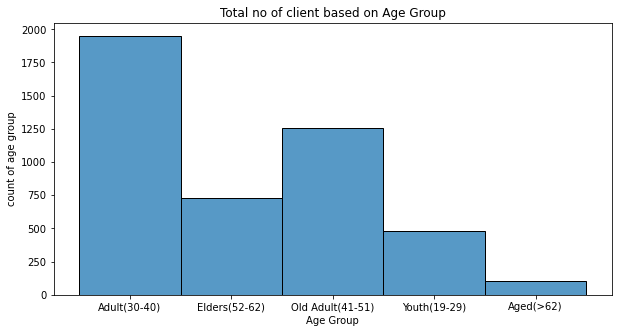

In [18]:
#visualize  age group
plt.figure(figsize=(10,5))
sns.histplot (x="age_group", data= data)
plt.title ("Total no of client based on Age Group")
plt.xlabel("Age Group")
plt.ylabel("count of age group")

The data attributes obtained from the marketing campaign reports for the portuguese banking institution were more of adults with ages between 30 - 40 years  compared to other age groups

In [19]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0, 0.5, 'count of job')

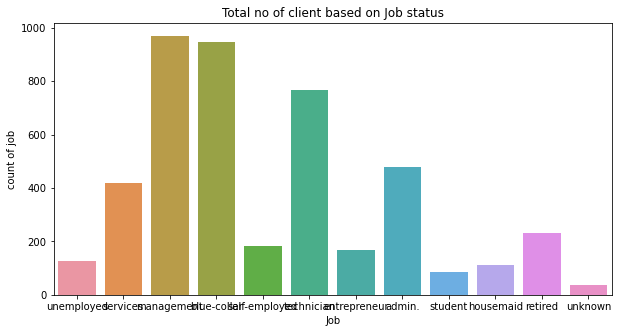

In [20]:
#visualize  Job
plt.figure(figsize=(10,5))
sns.countplot (x="job", data= data)
plt.title ("Total no of client based on Job status")
plt.xlabel("Job")
plt.ylabel("count of job")

In terms of job type, the data attributes obtained from the marketing campaign reports for the portuguese banking institution were more of those in management sector

Text(0, 0.5, 'count of communication type')

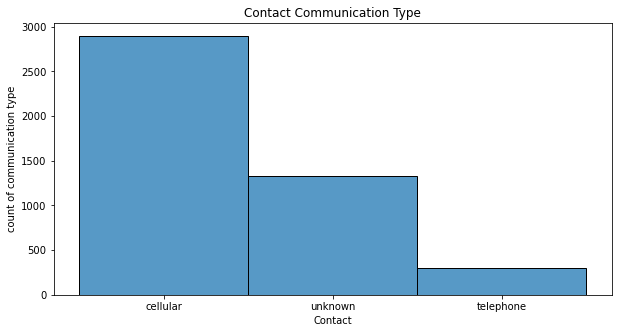

In [21]:
#visualize  contact communication type
plt.figure(figsize=(10,5))
sns.histplot (x="contact", data= data)
plt.title ("Contact Communication Type")
plt.xlabel("Contact")
plt.ylabel("count of communication type")

From this plot, more clients were gotten through cellular communication type

<AxesSubplot:title={'center':'Marital Status'}, ylabel='marital'>

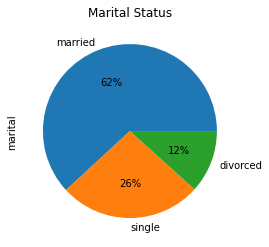

In [22]:
#visualize  marital status
plt.title('Marital Status')
data.marital.value_counts().plot.pie(autopct='%.0f%%')


From this campaign, 62% of the clients were married

<AxesSubplot:title={'center':'Outcome of previous marketing campaign'}, ylabel='poutcome'>

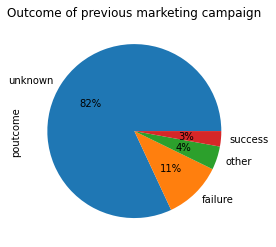

In [23]:
#visualize  Outcome of previous marketing campaign
plt.title('Outcome of previous marketing campaign')
data.poutcome.value_counts().plot.pie(autopct='%.0f%%')


Here, there were the unknown outcome of previous marketing campaign  was 82%

<AxesSubplot:xlabel='previous', ylabel='count'>

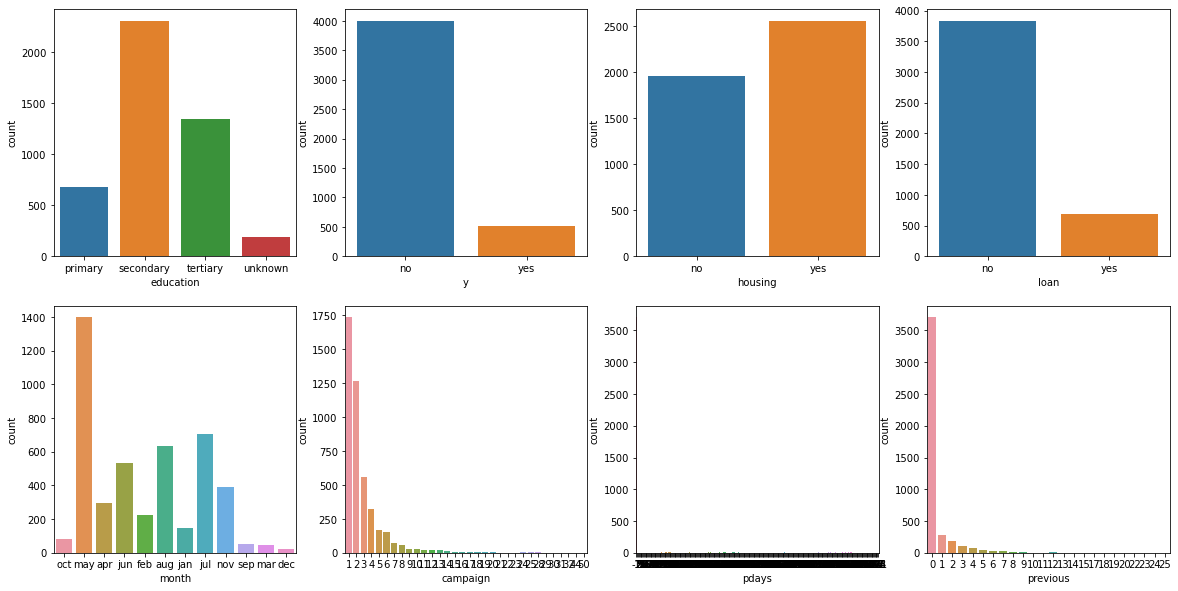

In [24]:
#univariate analysis cells

#To disable warnings
import warnings
warnings.filterwarnings("ignore")


# For the other univariate analysis , we will create a subplot for both categorical and numerical variables

fig, axes = plt.subplots(2, 4, figsize = (20, 10))
sns.countplot("education", data =data, ax=axes[0,0])
sns.countplot("y", data =data, ax=axes[0,1])
sns.countplot("housing", data =data, ax=axes[0,2])
sns.countplot("loan", data =data, ax=axes[0,3])
sns.countplot("month", data =data, ax=axes[1,0])
sns.countplot("campaign", data =data, ax=axes[1,1])
sns.countplot("pdays", data =data, ax=axes[1,2])
sns.countplot("previous", data =data, ax=axes[1,3])



## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

Text(0, 0.5, 'count of passengers')

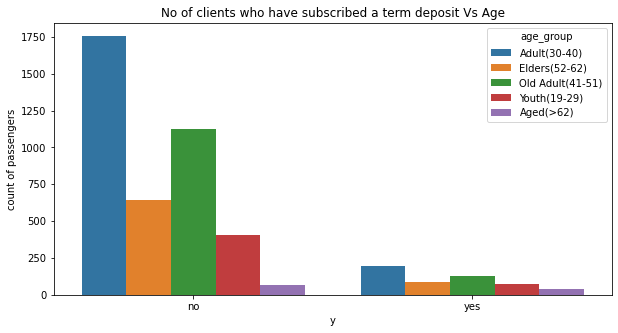

In [25]:
#bivariate analysis cells
# y vs age

# create visualization
plt.figure(figsize = (10,5))
plt.title ("No of clients who have subscribed a term deposit Vs Age")
sns.countplot(x ="y", data= data, hue = "age_group")
plt.xlabel("y")
plt.ylabel("count of passengers")

### From this chart, we have more of clients who didnt subscribe to the term deposit  and were  in adult age group

Text(0, 0.5, 'count of passengers')

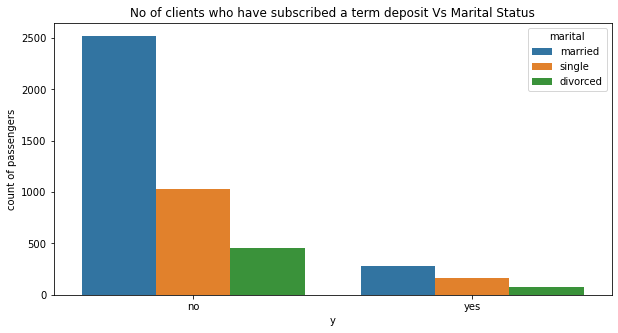

In [26]:
#bivariate analysis cells
# y vs marital status

# create visualization
plt.figure(figsize = (10,5))
plt.title ("No of clients who have subscribed a term deposit Vs Marital Status")
sns.countplot(x ="y", data= data, hue = "marital")
plt.xlabel("y")
plt.ylabel("count of passengers")

### From this chart, we have more clients who didnt subscribe to the term deposit and they were mostly married 

Text(0, 0.5, 'count of passengers')

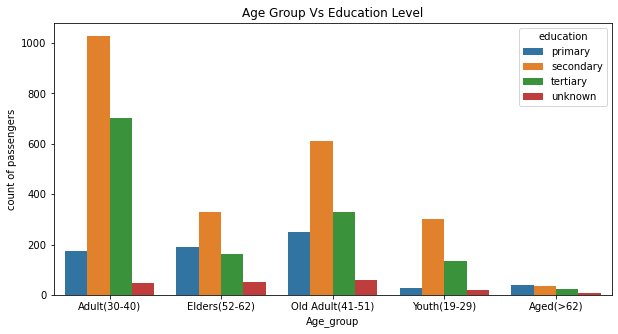

In [27]:
#bivariate analysis cells
# age vs Education

# create visualization
plt.figure(figsize = (10,5))
plt.title ("Age Group Vs Education Level")
sns.countplot(x ="age_group", data= data, hue = "education")
plt.xlabel("Age_group")
plt.ylabel("count of passengers")

### From the dataset gotten from the campaign, we have more client in adult age group in secondary education level

<AxesSubplot:title={'center':'age'}, xlabel='marital'>

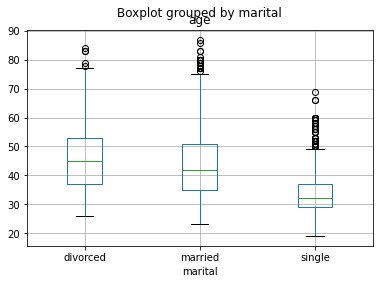

In [28]:
#For bivariate

data.boxplot(column= "age", by ="marital")

<AxesSubplot:xlabel='age', ylabel='balance'>

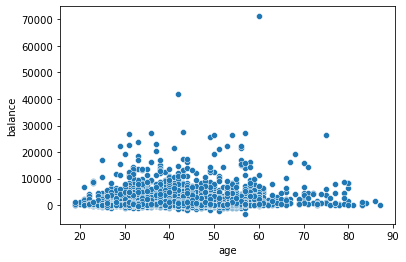

In [29]:
sns.scatterplot(x=data["age"], y=data["balance"])

Text(0, 0.5, 'count of passengers')

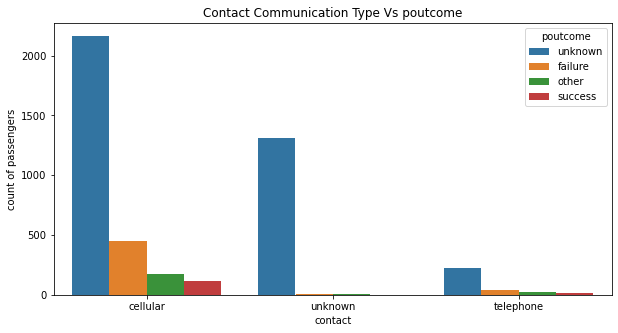

In [30]:
#bivariate analysis cells
# contact vs poutcome

# create visualization
plt.figure(figsize = (10,5))
plt.title ("Contact Communication Type Vs poutcome")
sns.countplot(x ="contact", data= data, hue = "poutcome")
plt.xlabel("contact")
plt.ylabel("count of passengers")

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:xlabel='poutcome', ylabel='age'>

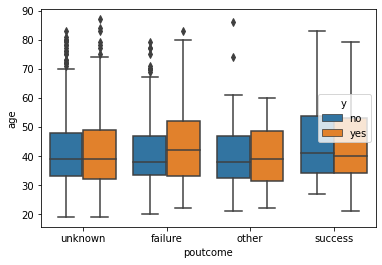

In [31]:
sns.boxplot(x= "poutcome", y= "age", hue ="y", data= data)

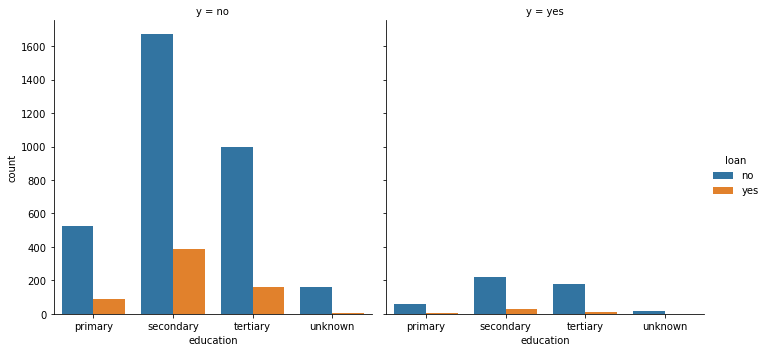

In [32]:
#multivariate analysis cells
#categorical plot

sns.catplot(col= "y", x="education", hue = "loan", data=data, kind= "count")

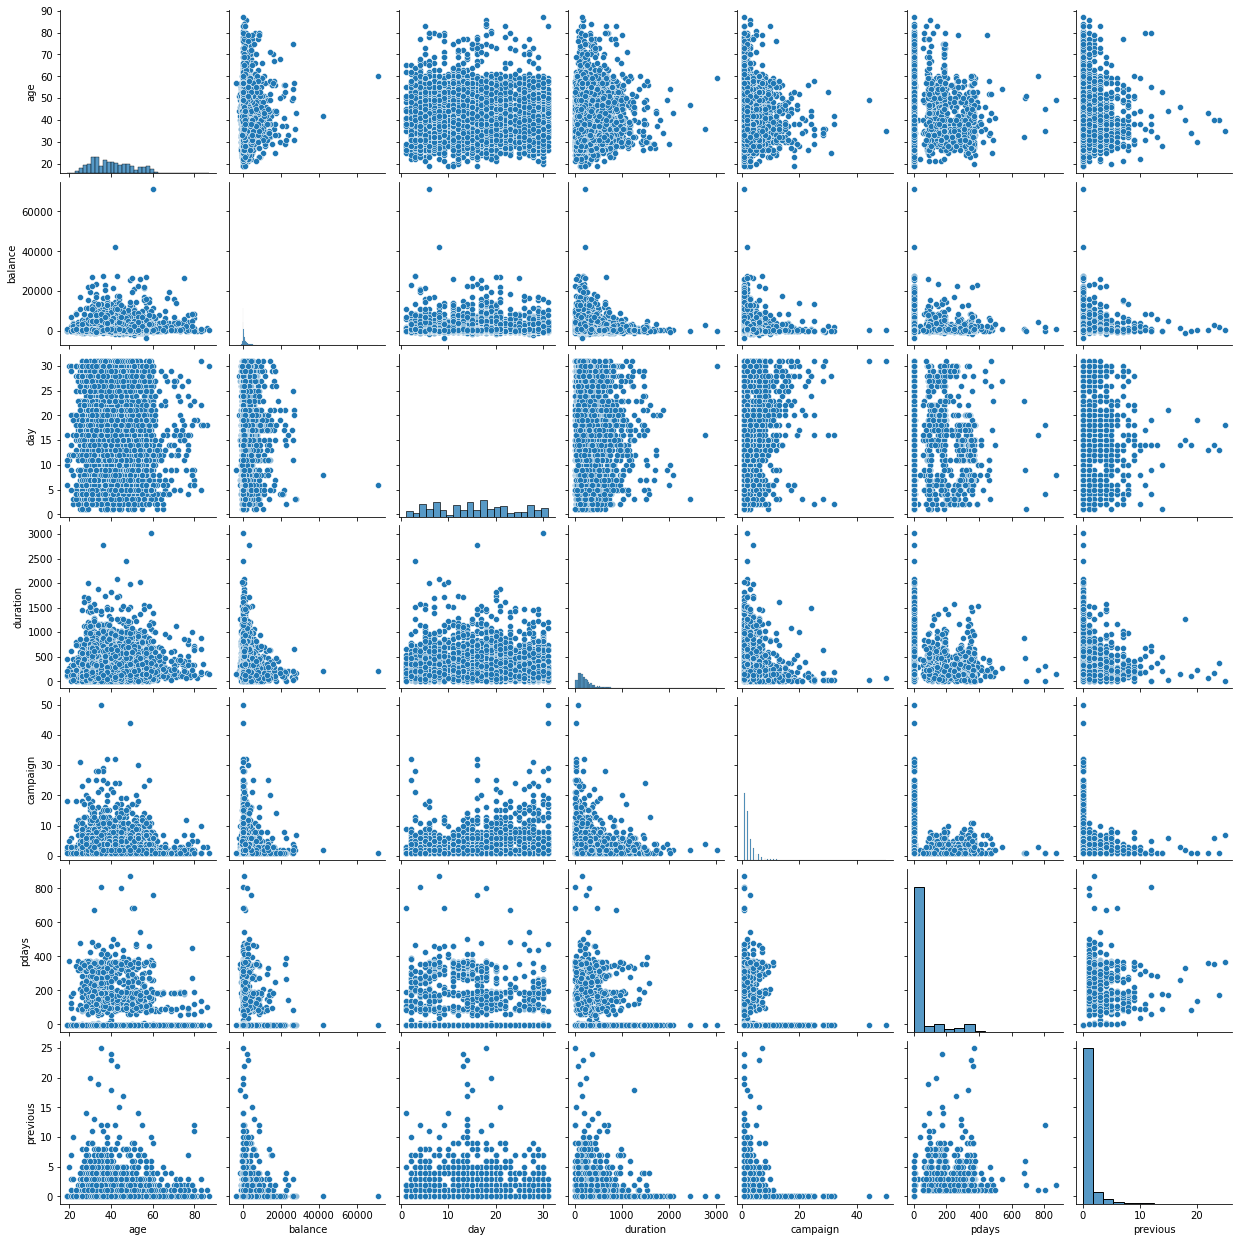

In [33]:
#multivariate analysis cells
sns.pairplot(data)

In [34]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


<AxesSubplot:>

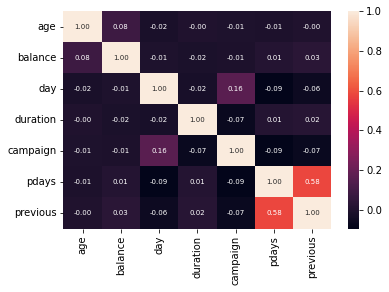

In [35]:
# we have to visualize the correlation
corel = data.corr()

sns.heatmap(corel, cbar= True , annot= True, fmt =".2f", annot_kws={'size':7})


# Summary of Findings

In this markdown cell, summarize your list of findings.

1. From the dataset, we have more clients that didnt subscribe to the product ( bank term deposit). 
2. The data attributes obtained from the marketing campaign reports for the portuguese banking institution were more of adults with ages between 30 - 40 years  compared to other age groups
3. In terms of job type, the data attributes obtained from the marketing campaign reports for the portuguese banking institution were more of those in management sector
4. 

# Modelling

In this section, you will train and evaluate your models


## One hot Encoding

In [36]:
#1. select categorical variables

categorical = ['job','marital','education','housing','loan','contact','month','poutcome',]


In [37]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(data[categorical])

#view what you have done
categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [38]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

data = pd.concat([data,categories_dummies], axis=1)

#check what you have done
print(data.shape)
data.head()

(4521, 59)


,age,job,marital,education,balance,housing,loan,contact,day,month,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,unemployed,married,primary,1787,no,no,cellular,19,oct,...,0,0,0,0,1,0,0,0,0,1
2,33,services,married,secondary,4789,yes,yes,cellular,11,may,...,0,0,1,0,0,0,1,0,0,0
3,35,management,single,tertiary,1350,yes,no,cellular,16,apr,...,0,0,0,0,0,0,1,0,0,0
4,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,...,1,0,0,0,0,0,0,0,0,1
5,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,1


In [39]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once


data.drop(categorical,axis=1, inplace= True)


In [40]:
data.drop('age_group',axis=1, inplace= True)

In [41]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,no,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
5,59,0,5,226,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1


In [42]:
# for target variable y , 1 replace no with 0 and yes with 1

# y(1= yes , 0 =no)

#create a function that categorized y
def y1(y):
    if y == "no":
        return 0
    else:
        return 1
    
#Then create a new column
data["y1"]= data["y"].apply(y1)

data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y1
1,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,4789,11,220,1,339,4,no,0,0,...,0,1,0,0,0,1,0,0,0,0
3,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,1476,3,199,4,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,1,0
5,59,0,5,226,1,-1,0,no,0,1,...,0,1,0,0,0,0,0,0,1,0


In [43]:
data.drop('y',axis=1, inplace= True)

data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y1
1,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,4789,11,220,1,339,4,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,59,0,5,226,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


### Select Target



In [44]:
y = data.y1

## Select features

In [45]:
X = data.drop(['y1'], axis = 1)

In [46]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4518,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4519,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4520,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Import ML algorithms and initialize them

In [47]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [48]:
## Train test split( training on 80% while testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [49]:
# TODO: initialize logistic regression
LR = LogisticRegression(random_state=42)

In [50]:
#TODO: initialize k neighbors
KN = KNeighborsClassifier()

In [51]:
#TODO: initialize decision tree
DC = DecisionTreeClassifier(random_state=42)

In [52]:
#TODO: initialize random forest
RF = RandomForestClassifier(random_state=42)

In [53]:
#create list of your model names
models = [LR,KN,DC,RF]

In [60]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)

    


For LogisticRegression, Accuracy score is 0.8972375690607735 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       805
           1       0.59      0.23      0.33       100

    accuracy                           0.90       905
   macro avg       0.75      0.61      0.64       905
weighted avg       0.88      0.90      0.88       905



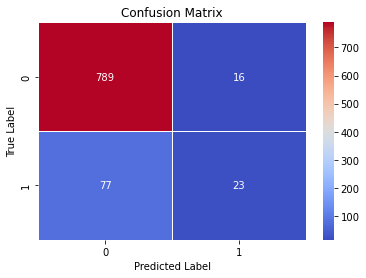


For KNeighborsClassifier, Accuracy score is 0.8784530386740331 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       805
           1       0.37      0.14      0.20       100

    accuracy                           0.88       905
   macro avg       0.63      0.56      0.57       905
weighted avg       0.84      0.88      0.85       905



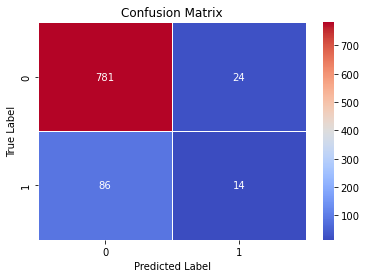


For DecisionTreeClassifier, Accuracy score is 0.8839779005524862 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       805
           1       0.47      0.45      0.46       100

    accuracy                           0.88       905
   macro avg       0.70      0.69      0.70       905
weighted avg       0.88      0.88      0.88       905



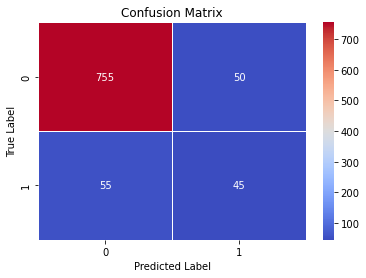


For RandomForestClassifier, Accuracy score is 0.9060773480662984 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       805
           1       0.68      0.28      0.40       100

    accuracy                           0.91       905
   macro avg       0.80      0.63      0.67       905
weighted avg       0.89      0.91      0.89       905



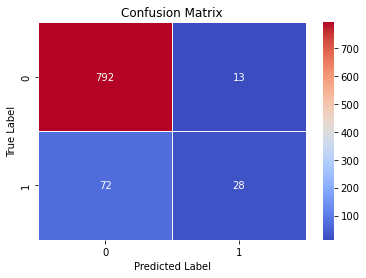

In [63]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

#### The Random Forest Classifier  model with default parameters yields 91% accuracy on training data.

#### Precision Score: This means that 68% of all the things we predicted came true. that is 68% of clients will subscribe to bank term deposit.

#### Recall Score: In all the actual positives, we only predicted 28% of it to be true.

## Summary

What model should be deployed to production?
Any other comments?

### The Randomforest classifier model should be deployed.